In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder,OneHotEncoder

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier


from sklearn.model_selection import train_test_split, learning_curve
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor
import xgboost as xgb



from sklearn import  preprocessing
from geopy.distance import geodesic 


/home/ali/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("CardioGoodFitness.csv")
data =df.copy()

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
def check_dataframe(dataset,head = 5):
    print(10*"#" + "Shape".center(10) + 10*"#")
    print(dataset.shape)
    print("\n"+ 10*"#" + "Types".center(10) + 10*"#")
    print(dataset.dtypes)
    print("\n"+ 10*"#" + "First 5 Rows".center(20) + 10*"#")
    print(dataset.head(head))
    print("\n"+ 10*"#" + "Last 5 Rows".center(20) + 10*"#")
    print(dataset.tail(head))
    print("\n"+ 10*"#" + "Missing Values".center(20) + 10*"#")
    print(dataset.isnull().sum())
    print("\n"+ 10*"#" + "Description of Dataset".center(30) + 10*"#")
    print(dataset.describe([0,0.10, 0.25, 0.50,0.75,0.99]).T)
check_dataframe(df)

##########  Shape   ##########
(180, 9)

##########  Types   ##########
Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

##########    First 5 Rows    ##########
  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47

##########    Last 5 Rows     ##########
    Product  Age Gender  Education MaritalStatus  Usage  Fitness  Income  \
175   TM798   40   Male         21        Single      6        5

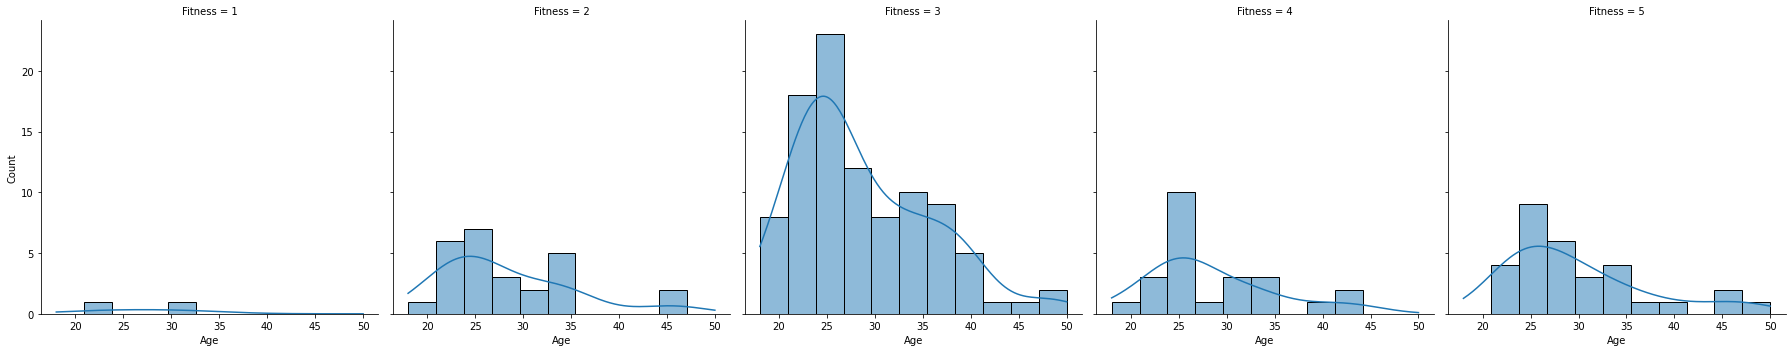

In [7]:
sns.displot(data=data, x="Age", col="Fitness", kde=True,)

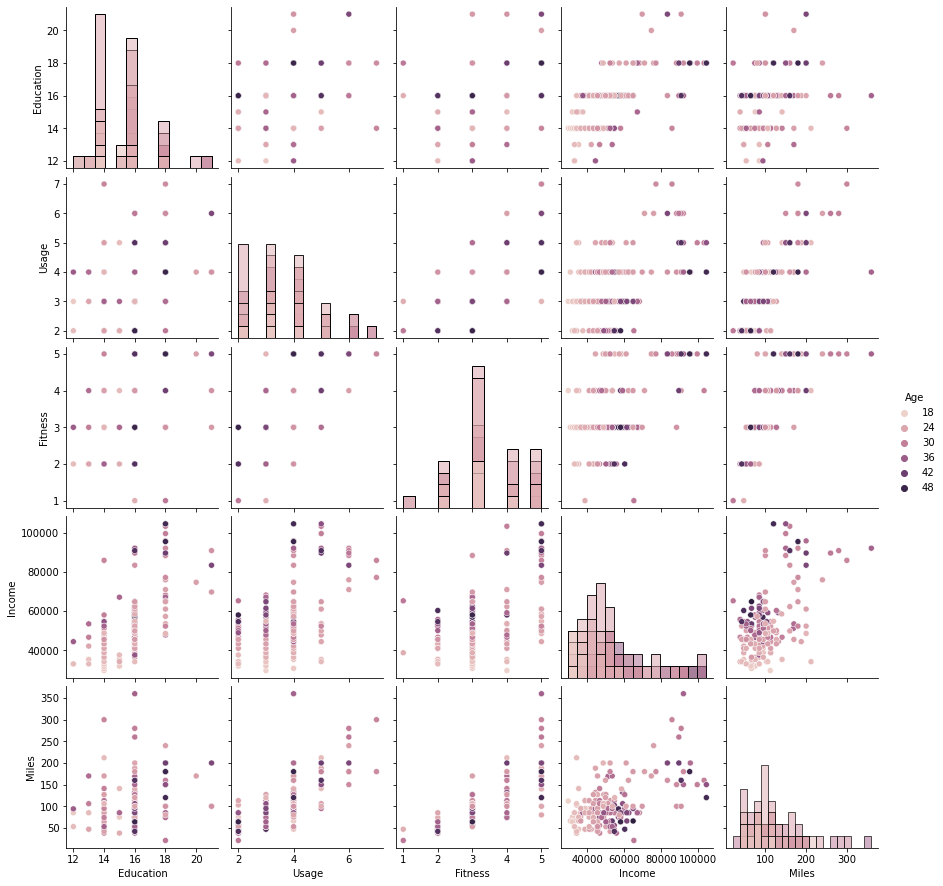

In [8]:
sns.pairplot(data=data, hue="Age", diag_kind="hist")

<AxesSubplot:xlabel='Age', ylabel='Income'>

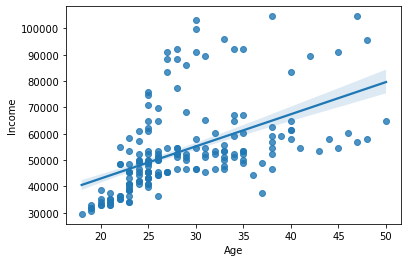

In [9]:
sns.regplot(data =df, x='Age' , y='Income',ci=75, n_boot=2000)

<AxesSubplot:>

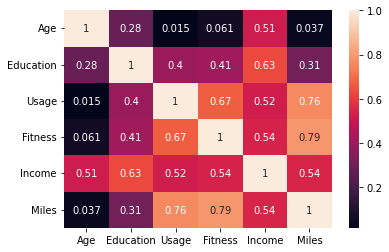

In [10]:
sns.heatmap(df.select_dtypes(include="number").corr(), annot = True)

Text(0.5, 1.0, 'Product Distribution')

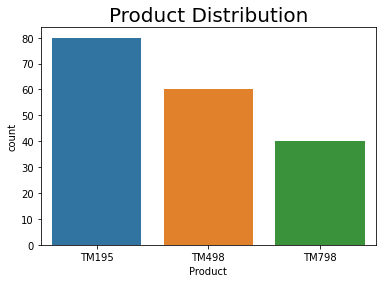

In [11]:
plot = sns.countplot(x ='Product', data = df)
plot.axes.set_title("Product Distribution",fontsize=20)

Text(0.5, 1.0, 'Age Distribution')

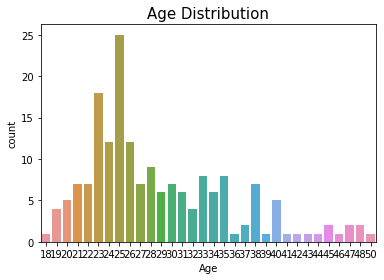

In [12]:
plot = sns.countplot(x ='Age', data = df)
plot.axes.set_title("Age Distribution", fontsize=15)

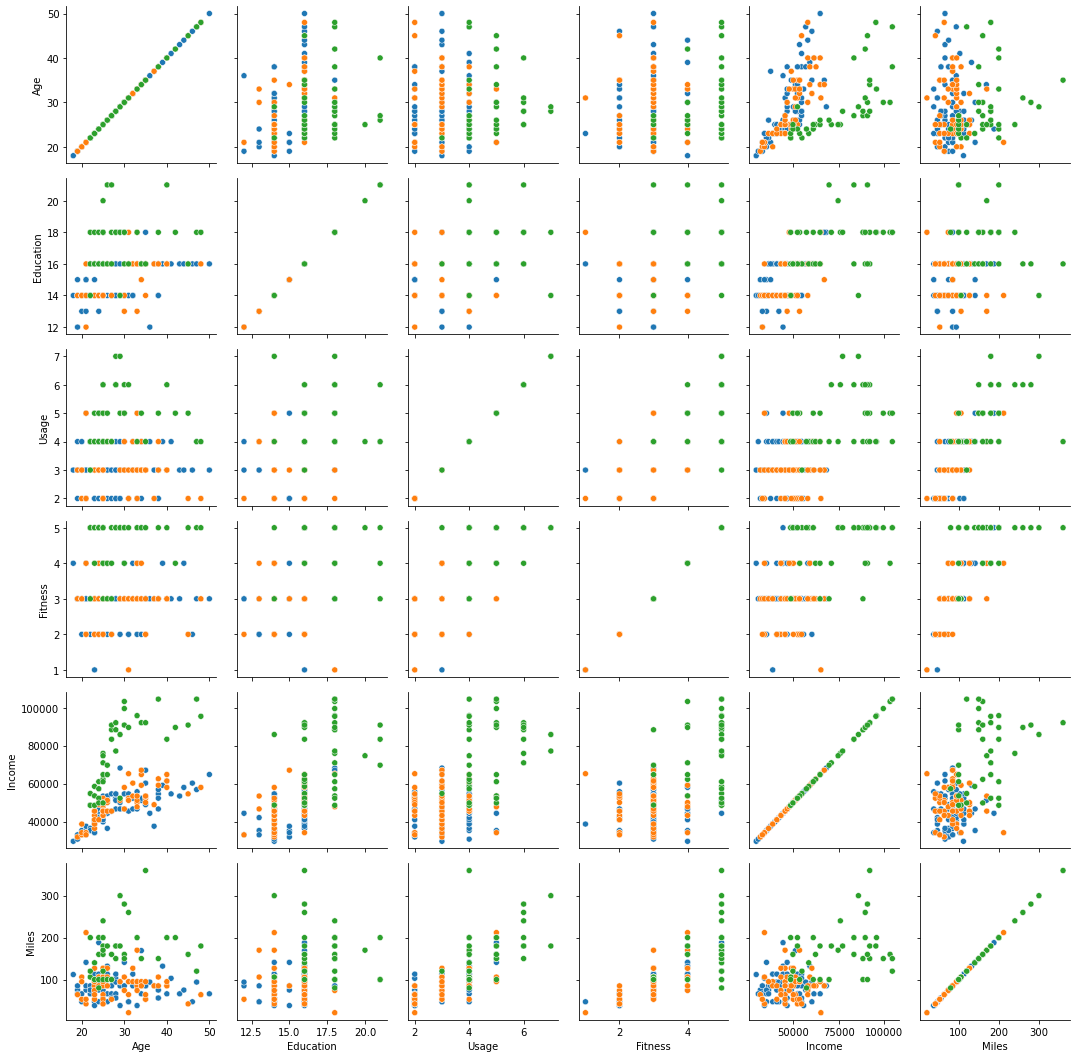

In [13]:
g = sns.PairGrid(data,hue = 'Product')
g.map(sns.scatterplot)

In [ ]:
g = sns.PairGrid(data, diag_sharey=False,hue = 'Product')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

In [ ]:
sns.kdeplot(
    data=data,x="Education", y="Fitness",hue = 'Product')


In [ ]:
sns.relplot(
    data=data, kind="scatter",
    x="Age", y="Miles",hue = 'Product', facet_kws=dict(sharex=False),sizes=(5, 10)
)


In [ ]:
sns.relplot(
    data=data, kind="scatter",
    x="Age", y="Income", facet_kws=dict(sharex=False),hue = 'Product',
)

In [ ]:
df['Product']=pd.factorize(df.Product)[0]
df['Gender']=pd.factorize(df.Gender)[0]
df['MaritalStatus']=pd.factorize(df.MaritalStatus)[0]

In [ ]:
X = df.drop(['Miles'],axis=1)
y= df['Miles']

In [ ]:
oh=OneHotEncoder(drop='first',handle_unknown='ignore')
s1=StandardScaler()
m1=MinMaxScaler()

ct=ColumnTransformer(
                    [
                        ('cat_encoder',oh,make_column_selector(dtype_include='object')),
                        ('StandardScaler',s1,make_column_selector(dtype_include='object')),
                        ('Numerical Scaler',m1,make_column_selector(dtype_exclude='object')),  
                    ]
                    ,remainder='passthrough')
X=ct.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
lr = LinearRegression(n_jobs=-1)
svr = SVR(max_iter=2000)
dtr = DecisionTreeRegressor()
knnr = KNeighborsRegressor(n_neighbors=3,n_jobs=-1)
rfr = RandomForestRegressor(n_jobs=-1,n_estimators= 900,)
abr = AdaBoostRegressor(n_estimators=2000,learning_rate=0.85)
sr =SGDRegressor()
cbr = CatBoostRegressor(iterations=400, learning_rate=.80,depth=16,eval_metric='MAE', verbose=200)
xg_reg  =xgb.XGBRFRegressor(colsample_bynode=1,max_depth=35,min_child_weight= 11,alpha= 6.9353429991712695e-08,
    subsample= 1,colsample_bytree= 0.99,gamma= 1,
                            n_estimators=300,n_jobs=-1,random_state=23,grow_policy= 'depthwise')

reg_list=[lr,svr,dtr,knnr,rfr,abr,cbr,xg_reg]

In [ ]:
%%time

counter=1
for reg in reg_list:
    reg.fit(X_train,y_train.values.ravel())
    print(f"Fitting {counter} done")
    counter+=1
#

In [ ]:
%%time
score_dict={}

for reg in reg_list:
    
    reg_name = reg.__class__.__name__
    
    pred=reg.predict(X_test)
    print("-"*50)
    
    print(reg_name)
    mse = mean_squared_error(pred, y_test)
    rmse = np.sqrt(mse)
    print(f"R2 Score : {r2_score(y_test,pred)}")
    print(f"Mean Absolute Error Score : {mean_absolute_error(y_test,pred)}")
    print(f"Mean Squared Error Score : {mean_squared_error(y_test,pred)}")
    print(f"RMSE : {rmse}")
    
    
    score_dict[reg_name]={
        "R2 Score":r2_score(y_test,pred),
        "Mean Absolute Error Score":mean_absolute_error(y_test,pred),
        "Mean Squared Error Score":mean_squared_error(y_test,pred),
        "RMSE" : rmse,

    }

In [ ]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values("R2 Score",ascending=False)
score_pd